In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
num_images = 1
img_dim = 16 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 8
psf_stdev = 3.25
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 8 
total flux
 517862.09375 
loc
 [[15.534685   3.7636108]
 [ 6.080846   5.085106 ]
 [ 8.980636  14.180791 ]
 [ 3.650249   8.03778  ]
 [ 9.338193   7.001665 ]
 [ 4.409263   1.2575458]
 [ 6.487659  14.116005 ]
 [ 3.5637362  1.1865402]] 




True count: 8
True total flux: 517862.09375
Naive estimated source count (true total flux / prior mean flux): 8.091595649719238

Starting the sampler...
iteration 5, temperature = 0.0009999698959290981, posterior mean count = 7.948899269104004
iteration 10, temperature = 0.002766127698123455, posterior mean count = 8.116589546203613
iteration 15, temperature = 0.005527892615646124, posterior mean count = 8.12598991394043
iteration 20, temperature = 0.010206280276179314, posterior mean count = 8.100025177001953
iteration 25, temperature = 0.019100001081824303, posterior mean count = 8.060813903808594
iteration 30, temperature = 0.037029195576906204, posterior mean count = 8.047088623046875
iteration 35, temperature = 0.07085270434617996, posterior mean count = 8.05202865600586
iteration 40, temperature = 0.1286908984184265, posterior mean count = 8.077194213867188
iteration 45, temperature = 0.21600845456123352, posterior mean count = 8.096635818481445
iteration 50, temperature = 0.3292

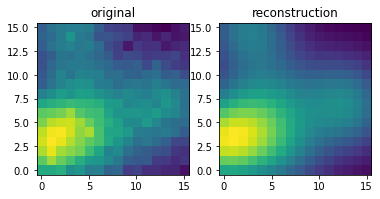

In [4]:
max_objects_smc = max_objects + 2
pad = 0
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3., pad)
smc = SMCsampler(images[0], image_attributes, prior,
                 max_objects = max_objects_smc, catalogs_per_block = 500,
                 kernel_num_iters = 100,
                 max_smc_iters = 500,
                 wastefree = False, wastefree_M = 10)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}")

smc.run(print_progress = True)
smc.summarize()